In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from IPython.display import Markdown, display
# def printmd(string):
#     display(Markdown(string))

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

---
# Clustering

In [3]:
df = pd.read_csv('chicago_brook-park_neighs_clean3.csv', index_col = 0)
df.head()

,area,population,avg household size,avg number of cars apts,avg number of cars houses,males,med age females,med age males,med household income,med rent,...,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,avg number of cars,med age
Neighborhood,,,,,,,,,,,,,,,,,,,,,
"Albany Park, Chicago, IL",1.915,48511,5.8,1.1,1.6,24255.5,36.9,36.4,59415.0,869.0,...,0.00,0.01,0.0,0.0,0.0,0.0,0.00,0.0,1.1,36.65
"Andersonville, Chicago, IL",0.634,14490,5.8,0.9,1.4,7245.0,39.6,38.9,69602.0,1104.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.9,39.25
"Appletree, West Chicago, IL",0.126,29,3.9,1.4,1.3,16.0,34.9,31.4,63122.0,902.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.4,33.15
"Archer Heights, Chicago, IL",1.966,19343,3.4,1.1,1.8,9671.5,34.0,34.4,45601.0,707.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.1,34.20
"Armour Square, Chicago, IL",0.526,8188,2.5,0.7,2.0,4094.0,45.0,36.7,26262.0,488.0,...,0.02,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.7,40.85


In [4]:
list(df.columns)

['area',
 'population',
 'avg household size',
 'avg number of cars apts',
 'avg number of cars houses',
 'males',
 'med age females',
 'med age males',
 'med household income',
 'med rent',
 'pct born in another us state',
 'pct born in state',
 'pct families with children',
 'pct family household',
 'pct foreign born residents',
 'pct married couple',
 'pct native residents born outside us',
 'pct never married females > 15',
 'pct never married males > 15',
 'pct not speak English well',
 'pct single mother',
 'pct units mortgage',
 'ATM',
 'Accessories Store',
 'African Restaurant',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'BBQ Joint',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Stadium',
 'Basketball Court',
 'Bavarian Restaurant',

### Socioeconomic
+ The dataset contains has too many fields to visualize them all at once. So, first visualize correlation between social attributes.

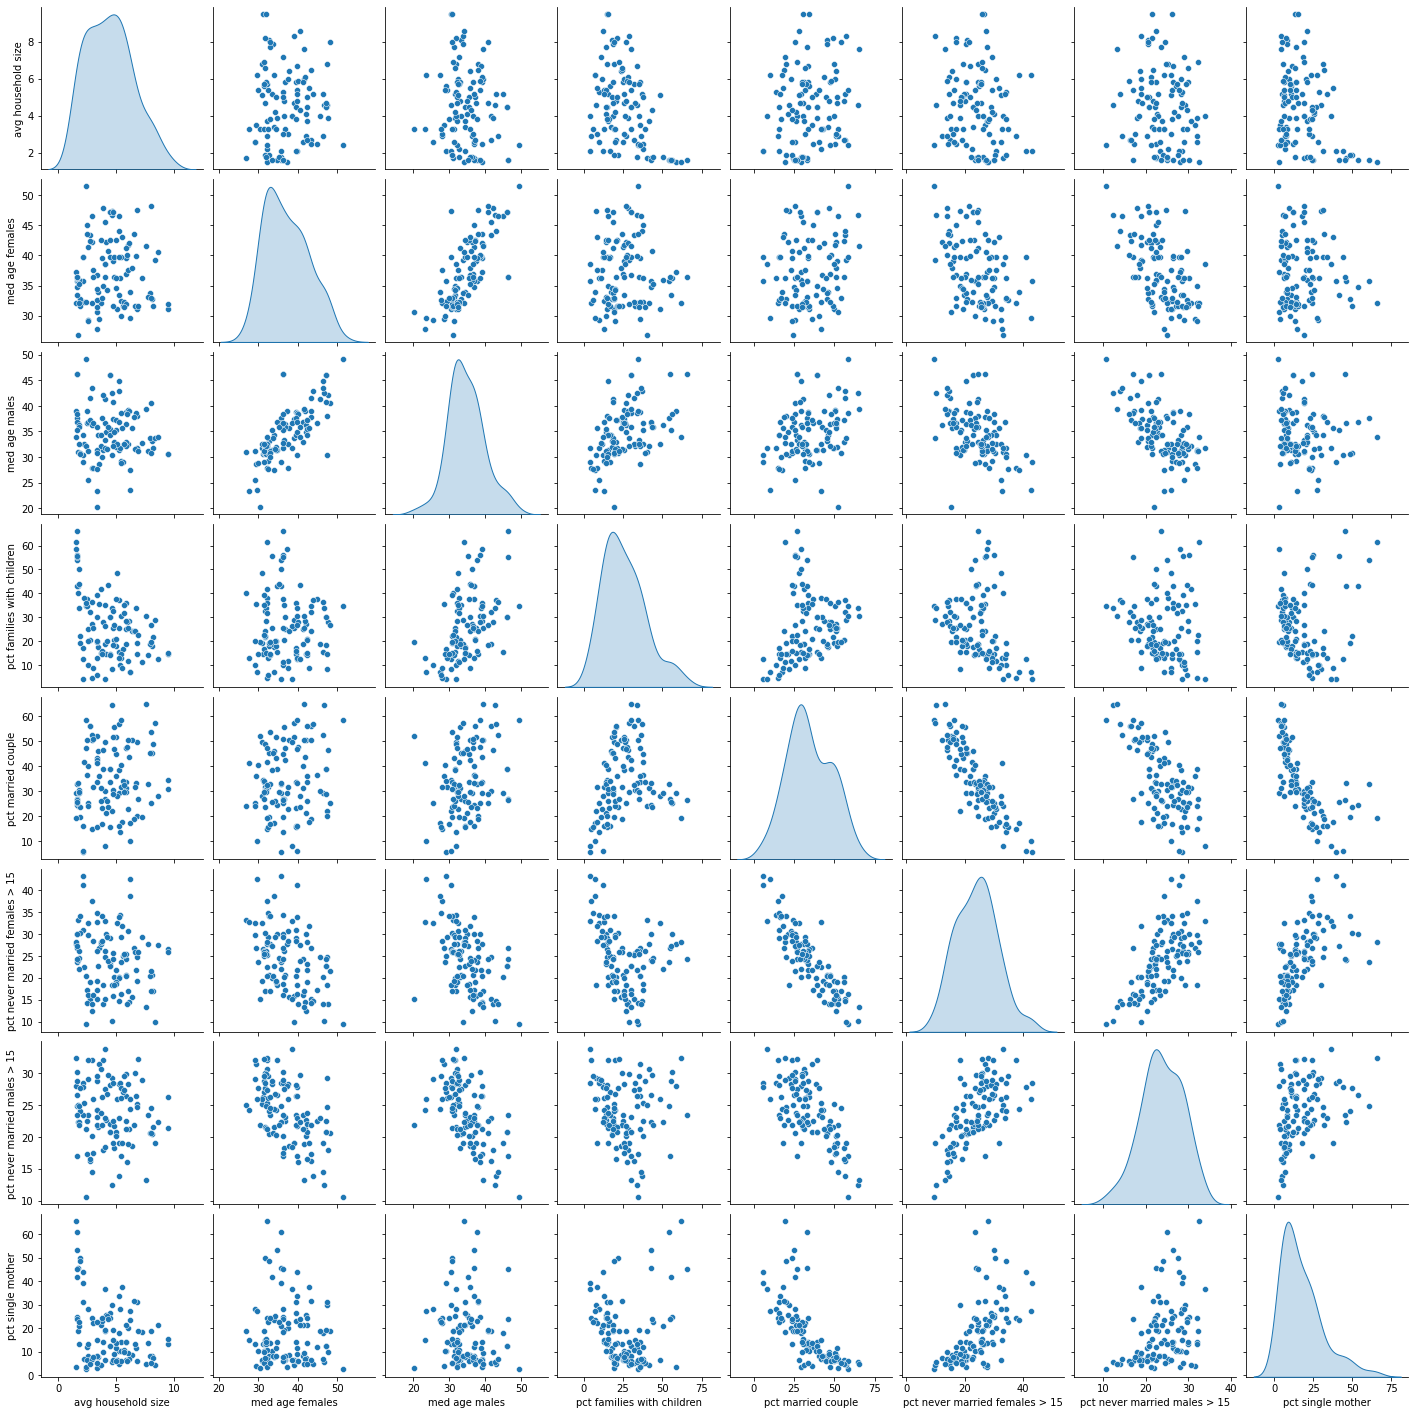

In [5]:
sns.pairplot(df, 
             diag_kind="kde",
             vars = ['avg household size'
                     ,'med age females','med age males'
                     ,'pct families with children'
                     ,'pct married couple'
                     ,'pct never married females > 15'
                     ,'pct never married males > 15'
                     ,'pct single mother'])
plt.show()

+ Summary -- The data demonstrates rather weak positive and negative correlations.

### Economic attributes and proximity to venues

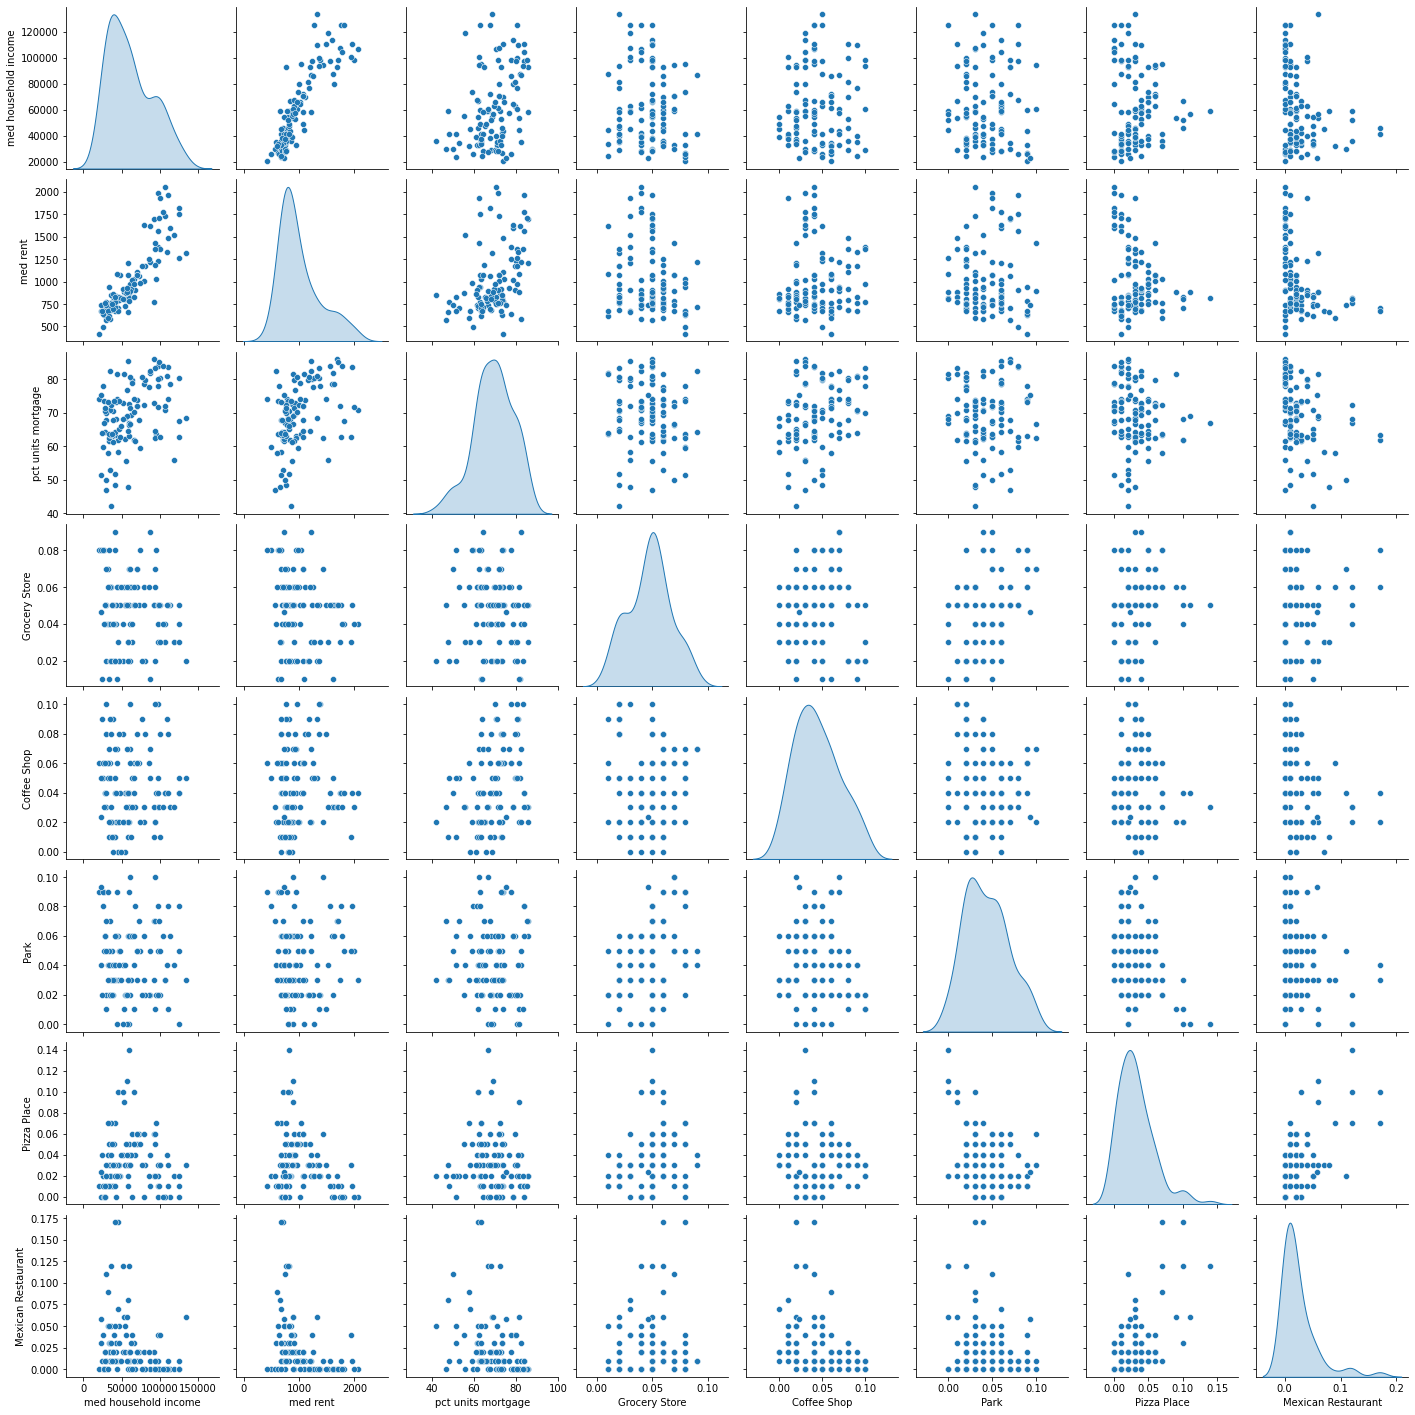

In [6]:
sns.pairplot(df, 
             diag_kind='kde',
             vars = ['med household income' ,'med rent' ,'pct units mortgage',
                     'Grocery Store','Coffee Shop','Park','Pizza Place',
                     'Mexican Restaurant'])
plt.show()

# ['Grocery Store', 'Park', 'Coffee Shop', 'Pizza Place', 'Mexican Restaurant']

+ The venue data looks a little sparse, however it still makes sense to include it in further analysis.

### Summary

For further analysis and clustering, we chose the following set of fields:

'avg household size','med age females','med age males','pct families with children','pct married couple','pct never married females > 15','pct never married males > 15','pct single mother','med household income', 'med rent','pct units mortgage','med household income' ,'med rent' ,'pct units mortgage','Grocery Store','Coffee Shop','Park','Pizza Place','Mexican Restaurant'

In [7]:
df[['avg household size','med age females',
    'med age males','pct families with children',
    'pct married couple','pct never married females > 15',
    'pct never married males > 15','pct single mother',
    'med household income','med rent' ,'pct units mortgage',
    'Grocery Store','Coffee Shop','Park','Pizza Place','Mexican Restaurant'
   ]].to_csv('chicago_brook-park_neighs_clean4.csv')

# ['Grocery Store', 'Park', 'Coffee Shop', 'Pizza Place', 'Mexican Restaurant']

In [8]:
df = pd.read_csv('chicago_brook-park_neighs_clean4.csv', index_col = 0)
df.head()

,avg household size,med age females,med age males,pct families with children,pct married couple,pct never married females > 15,pct never married males > 15,pct single mother,med household income,med rent,pct units mortgage,Grocery Store,Coffee Shop,Park,Pizza Place,Mexican Restaurant
Neighborhood,,,,,,,,,,,,,,,,
"Albany Park, Chicago, IL",5.8,36.9,36.4,25.1,47.2,20.6,22.5,6.3,59415.0,869.0,72.5,0.05,0.02,0.06,0.04,0.02
"Andersonville, Chicago, IL",5.8,39.6,38.9,36.0,33.9,20.5,26.4,14.3,69602.0,1104.0,73.9,0.06,0.08,0.03,0.05,0.01
"Appletree, West Chicago, IL",3.9,34.9,31.4,15.4,39.1,18.3,32.1,14.2,63122.0,902.0,79.8,0.03,0.05,0.06,0.06,0.04
"Archer Heights, Chicago, IL",3.4,34.0,34.4,17.7,46.2,22.7,21.5,7.6,45601.0,707.0,61.9,0.06,0.02,0.03,0.10,0.17
"Armour Square, Chicago, IL",2.5,45.0,36.7,37.8,36.5,17.2,22.5,11.9,26262.0,488.0,59.7,0.08,0.05,0.08,0.02,0.00


+ The core of the analytic method is clustering of Chicago neighborhoods and Brook Park by socioeconomic and venues fields. The clustering algorithm places similar neighborhoods into the one cluster and so neighborhoods that are similar to Brook Park will have the same cluster number as Chicago.

In [9]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[ 0.67126116, -0.06440671,  0.34482416, ...,  0.6626126 ,
         0.3058711 , -0.14463293],
       [ 0.67126116,  0.43115784,  0.83743011, ..., -0.54748686,
         0.68962981, -0.44587194],
       [-0.27795117, -0.43149156, -0.64038773, ...,  0.6626126 ,
         1.07338851,  0.45784507],
       ...,
       [ 0.67126116, -0.98211883, -0.50245807, ..., -0.95085334,
        -0.0778876 , -0.74711094],
       [ 0.62130261, -1.0555358 , -0.42364111, ..., -1.35421983,
        -0.46164631, -0.74711094],
       [-0.32790971, -0.79857641, -0.9359513 , ...,  0.6626126 ,
        -0.84540501, -0.44587194]])

### Optimum number of clusters
+ To find the optimum number of clusters, apply 'elbow' method. The idea behind the method is to find average squared distances to cluster centers for various number of clusters. The optimum number of clusters is around the place where the distance stops dropping quickly, i.e. the 'elbow'.

In [10]:
max_k = 50
squared_distance = np.zeros(max_k)

for k in range(2, max_k):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans = kmeans.fit(df_scaled)
    squared_distance[k] = kmeans.inertia_
    print(k, sep=' ', end = ' ', flush = True)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

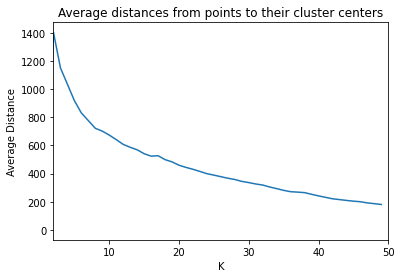

In [11]:
x = range(len(squared_distance))
plt.figure()
plt.plot(squared_distance)
plt.xlabel('K')
plt.ylabel('Average Distance')
plt.title('Average distances from points to their cluster centers')
plt.xlim([2,max_k])
plt.show()

In [12]:
kclusters = 10 # the optimum number of clusters
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(df)
df['cluster'] = kmeans.labels_

In [13]:
# Brook Park cluster number
df.loc['Brook Park, Brook Park, OH','cluster']

5.0

In [14]:
df.index == 'Brook Park'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [15]:
df['cluster'].nunique()

10

---
# Results

This section summarizes the results of clustering. The algorithm identified 10 clusters of neighborhoods, let us first see what these clusters are.

## Cluster centers
To help with interpreting the data, let us sort the clusters by a meaningful attribute. A good candidate for such attribute is median household income. 

In the table below the data is sorted in descending order, with the highest median household income ($125,527) at the top. 

One interesting observation is that median household income here correlates with percent married couple and median age males. There is also negative correlation between median household income and percent single mother.

Brook Park cluster has number 5, and it is approximately towards the end of the table.

In [16]:
df.groupby('cluster').mean().sort_values('med household income', ascending = False)

,avg household size,med age females,med age males,pct families with children,pct married couple,pct never married females > 15,pct never married males > 15,pct single mother,med household income,med rent,pct units mortgage,Grocery Store,Coffee Shop,Park,Pizza Place,Mexican Restaurant
cluster,,,,,,,,,,,,,,,,
4,1.800000,38.820000,42.260000,46.720000,32.260000,24.480000,20.640000,24.760000,125527.200000,1536.400000,67.100000,0.034000,0.042000,0.040000,0.016000,0.014000
7,2.214286,32.785714,33.585714,46.371429,31.414286,26.042857,27.728571,33.500000,109098.142857,1703.857143,77.742857,0.044286,0.050000,0.044286,0.011429,0.001429
0,3.500000,36.776923,36.607692,40.307692,40.146154,22.184615,22.223077,13.515385,96296.692308,1433.538462,75.030769,0.048462,0.043077,0.046923,0.031538,0.010769
6,4.314286,32.928571,33.200000,31.900000,34.885714,24.957143,25.057143,17.314286,82437.285714,1294.571429,79.042857,0.044286,0.057143,0.031429,0.027143,0.007143
2,4.766667,42.055556,40.022222,31.144444,45.344444,17.566667,20.177778,9.211111,69227.333333,1001.888889,68.122222,0.060000,0.051111,0.048889,0.057778,0.014444
8,4.860000,37.160000,34.706667,24.273333,39.480000,20.940000,24.293333,12.340000,59927.666667,918.133333,70.646667,0.045333,0.041333,0.045333,0.044667,0.028667
5,5.177778,40.733333,36.677778,24.333333,39.533333,20.333333,22.333333,12.744444,51922.000000,859.555556,67.000000,0.044444,0.027778,0.027778,0.046667,0.042222
1,5.478571,36.407143,33.328571,17.964286,37.728571,22.928571,22.814286,14.850000,42447.357143,801.142857,66.021429,0.041429,0.040000,0.044286,0.031429,0.046429
3,5.706250,38.093750,32.318750,13.725000,28.787500,25.737500,24.637500,20.493750,34912.562500,722.750000,64.500000,0.049375,0.041250,0.036250,0.031875,0.034375


## Brook Park cluster

Below is the summary of Brook Park cluster data. Let us compare Brook Park cluster against other clusters in Chicago:

* Brook Park has the second highest number of Pizza Places (0.046667), first is cluster #2
* Brook Park has the third highest number of household size (5%), the first is cluster #3
* Brook Park has the second highest number of Mexican Restaurants (0.042222), the first is cluster #1

When compared to other neighborhoods in Chicago, Brook Park seems to be more established (few units with mortgage) and close to parks. Based on these factors, it may be worth also considering clusters #9 and #1. The first has more parks, while still not too many units with mortgage. The second has a fraction more units with mortgage and still some proximity to the parks. 

In [17]:
df[df.cluster == 5].mean()

avg household size                    5.177778
med age females                      40.733333
med age males                        36.677778
pct families with children           24.333333
pct married couple                   39.533333
pct never married females > 15       20.333333
pct never married males > 15         22.333333
pct single mother                    12.744444
med household income              51922.000000
med rent                            859.555556
pct units mortgage                   67.000000
Grocery Store                         0.044444
Coffee Shop                           0.027778
Park                                  0.027778
Pizza Place                           0.046667
Mexican Restaurant                    0.042222
cluster                               5.000000
dtype: float64

### Neighborhoods in Brook Park cluster

In [18]:
list(df[df.cluster == 5].index)

['Ashburn, Chicago, IL',
 'Avondale, Chicago, IL',
 'Brainerd, Chicago, IL',
 'Brook Park, Brook Park, OH',
 'Hyde Park, Chicago, IL',
 "O'Hare, Chicago, IL",
 'Pill Hill (Calumet Heights), Chicago, IL',
 'Washington Heights, Chicago, IL',
 'West Lawn, Chicago, IL']

### Neighborhoods in clusters #1 and #9

In [19]:
list(df[(df.cluster == 1) | (df.cluster == 9)].index)

['Archer Heights, Chicago, IL',
 'Armour Square, Chicago, IL',
 'Avalon Park, Chicago, IL',
 'Belmont Cragin, Chicago, IL',
 'Brighton Park, Chicago, IL',
 'Bronzeville, Chicago, IL',
 'Chinatown, Chicago, IL',
 'Cragin (Belmont Cragin), Chicago, IL',
 'Douglas, Chicago, IL',
 'East Garfield Park, Chicago, IL',
 'East Side, Chicago, IL',
 'Englewood, Chicago, IL',
 'Grand Boulevard, Chicago, IL',
 'Greater Grand Crossing, Chicago, IL',
 'Hermosa, Chicago, IL',
 'Kenwood, Chicago, IL',
 'Madison Square, Chicago, IL',
 'McKinley Park, Chicago, IL',
 'Medical Village, Chicago, IL',
 'North Lawndale, Chicago, IL',
 'Riverdale, Chicago, IL',
 'Roseland, Chicago, IL',
 'South Deering, Chicago, IL',
 'South Shore, Chicago, IL',
 'University Village, Chicago, IL',
 'Washington Park, Chicago, IL',
 'West Englewood, Chicago, IL',
 'West Garfield Park, Chicago, IL',
 'Woodlawn, Chicago, IL']

---
# Map of clusters in Chicago

Let us visualize the map of neighborhood clusters. 

First, show the map of all neighborhoods colored according to their cluster number. The color also relates to the median household income, where the 'hotter' the color, the higher the income is.

In [20]:
import folium
import pickle
import matplotlib.cm as cm
import matplotlib.colors as colors

In [21]:
# Sort the clusters by median household income
field, asc = 'med household income', True
clusters = list(df.groupby('cluster').mean().sort_values(field, ascending = asc).index.values)
new_clusters = np.arange(0,max(clusters))
rename_dict = dict(zip(clusters, new_clusters))
df['map_cluster'] = df['cluster'].map(rename_dict)

In [22]:
# Load neighborhood coordinates file
with open('coords.pickle','rb') as f:
    coords = pickle.load(f)
coords

[('North Center, Chicago, IL', 41.9561073, -87.6791596),
 ('Ashburn, Chicago, IL', 41.7475332, -87.7111628),
 ('Grand Boulevard, Chicago, IL', 41.8139226, -87.6172724),
 ('Auburn Gresham, Chicago, IL', 41.7431667, -87.6537279),
 ('Lakeview East (East LakeView), Chicago, IL',
  42.2342527,
  -87.94502385438847),
 ('Albany Park, Chicago, IL', 41.9703294, -87.7159915),
 ('University Village, Chicago, IL', 14.6626582, 120.9745296),
 ('New Eastside, Chicago, IL', 41.70355375, -87.53501135),
 ('Medical Village, Chicago, IL', 41.8692947, -87.6744543),
 ('Cornerstone Lakes, West Chicago, IL', 41.9335692, -88.24785443348662),
 ('Andersonville, Chicago, IL', 41.9771393, -87.66927341557962),
 ('Woodland, West Chicago, IL', 41.6698454, -87.63062867819886),
 ('Avondale, Chicago, IL', 41.9389208, -87.711168),
 ('Belmont Cragin, Chicago, IL', 41.9308483, -87.7689488),
 ('West Englewood, Chicago, IL', 41.7780891, -87.6667177),
 ('Lakeview (Wrigleyville), Chicago, IL', 41.9428926, -87.6528527),
 ('Pill

In [23]:
df_coords = pd.DataFrame(coords, columns = ['Neighborhood','lat','lon'])

In [24]:
df_coords = df_coords.set_index('Neighborhood')
df_coords.head()

,lat,lon
Neighborhood,,
"North Center, Chicago, IL",41.956107,-87.679160
"Ashburn, Chicago, IL",41.747533,-87.711163
"Grand Boulevard, Chicago, IL",41.813923,-87.617272
"Auburn Gresham, Chicago, IL",41.743167,-87.653728
"Lakeview East (East LakeView), Chicago, IL",42.234253,-87.945024


In [25]:
# Join with other data
df_map = df_coords.join(df[['map_cluster',field]]).dropna()
df_map.head()

,lat,lon,map_cluster,med household income
Neighborhood,,,,
"Albany Park, Chicago, IL",41.970329,-87.715992,4.0,59415.0
"Andersonville, Chicago, IL",41.977139,-87.669273,5.0,69602.0
"Appletree, West Chicago, IL",41.858798,-88.189060,4.0,63122.0
"Archer Heights, Chicago, IL",41.811422,-87.726165,2.0,45601.0
"Armour Square, Chicago, IL",41.840231,-87.632986,0.0,26262.0


In [26]:
df_map[df_map.index == 'Brook Park, Brook Park, OH']

,lat,lon,map_cluster,med household income
Neighborhood,,,,
"Brook Park, Brook Park, OH",41.398384,-81.804579,3.0,54539.0


---
## All Chicago neighborhoods

Here we introduce another field map_cluster used solely to choose the right color of the neighborhood. Brook Park is map_cluster = 3

In [27]:
from pylab import *
cmap = plt.cm.plasma    # PiYG

palette = [matplotlib.colors.rgb2hex(cmap(int(i*cmap.N/kclusters+1))[:3]) for i in range(kclusters)]
#palette

# create map
latitude, longitude = 41.970329, -87.715992
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster, f in zip(df_map['lat']\
                                  , df_map['lon']\
                                  , df_map.index\
                                  , df_map['map_cluster']
                                  , df_map[field]):
    label_text = "%s, cluster: %d, %s:%d"%(str(poi),cluster, field, f)
    label = folium.Popup(label_text, parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=palette[cluster],
        fill=True,
        fill_color=palette[cluster],
        fill_opacity=0.7,
        cmap = plt.cm.plasma,
    ).add_to(map_clusters)
    
map_clusters

### Brook Park cluster

A 'cleaner' map with only recommended neighborhoods. This map illustrates that the recommended area is North East Chicago, east of the airport. Most of this area is within I-90 and I-94 highway. 

In [28]:
df_map[df_map.index == 'Brook Park, Brook Park, OH']

,lat,lon,map_cluster,med household income
Neighborhood,,,,
"Brook Park, Brook Park, OH",41.398384,-81.804579,3.0,54539.0


In [29]:
from pylab import *
cmap = plt.cm.plasma    # PiYG

palette = [matplotlib.colors.rgb2hex(cmap(int(i*cmap.N/kclusters+1))[:3]) for i in range(kclusters)]
#palette

# create map
latitude, longitude = 41.398384, -81.804579
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster, f in zip(df_map['lat']\
                                  , df_map['lon']\
                                  , df_map.index\
                                  , df_map['map_cluster']
                                  , df_map[field]):
    label_text = "%s, cluster: %d, %s:%d"%(str(poi),cluster, field, f)
    label = folium.Popup(label_text, parse_html=True)
    cluster = int(cluster)
    if cluster == 3:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=palette[cluster],
            fill= True,
            fill_color=palette[cluster],
            fill_opacity= 0.7,
            cmap = plt.cm.plasma,
        ).add_to(map_clusters)
    
map_clusters

### Brook Park cluster and clusters #1 and #9

This map includes neighborhoods from Brook Park cluster and clusters #1 and #9, which were found to be second priorities. Their map_cluster id's are 2 and 0.



# Conclusion

The project analyzes neighborhood similarity based on two data sources: socioeconomic data obtained from city-data.com and venues data from Foursquare. The socioeconomic data web scraping code can pull data for other neighborhoods. In fact, some neighborhoods in Chicago area belong to other cities like West Chicago so it would be nice to include this into the analysis in the future work. 

The data needed heavy cleaning as it contained nonexistent neighborhoods, missing data for neighborhoods, or neighborhoods consisting of a single household. Some socioeconomic data were not trustable either, such as neighborhoods with average number of vehicles exceeding 10 (apartments?). 

The venues data was usable, however, we wish Foursquare had returned more venues as the data was very sparse and difficult to use for clustering. In future work, it may also be useful to include data pertaining to schools, universities, and crime rate as such. 

Perhaps, another source of data worth considering is police and nuisance reports, accidents data, or may be sexual offenders residences.